In [4]:
import bob.measure as bm
import pandas as pd
from matplotlib import pyplot

In [43]:
source_folder = 'score_files_SRE16_SPARC-2-3'
enroll_language = 'hindi'
enroll_session = '02'
test_session = '03'
enroll_channel = 'iphone11'
test_channel = 'iphone6s'


In [44]:
channels = ['iphone11', 'iphone6s', 'samsungs8', 'samsungs7', 'iphone10']
combinations = []
for channel in channels:
    for channel2 in channels:
        if channel != channel2:
            combinations.append("{}-{}".format(channel, channel2))


iphone11-iphone6s
iphone11-samsungs8
iphone11-samsungs7
iphone11-iphone10
iphone6s-iphone11
iphone6s-samsungs8
iphone6s-samsungs7
iphone6s-iphone10
samsungs8-iphone11
samsungs8-iphone6s
samsungs8-samsungs7
samsungs8-iphone10
samsungs7-iphone11
samsungs7-iphone6s
samsungs7-samsungs8
samsungs7-iphone10
iphone10-iphone11
iphone10-iphone6s
iphone10-samsungs8
iphone10-samsungs7


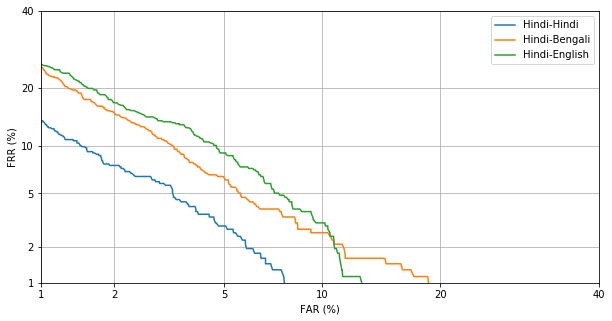

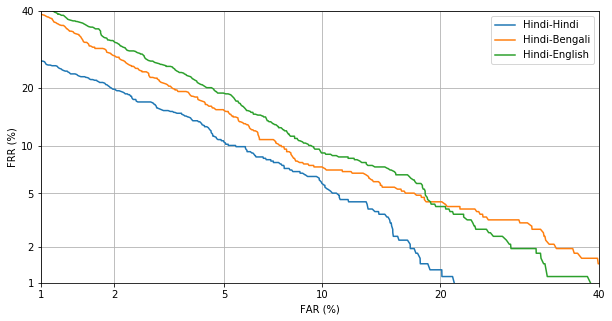

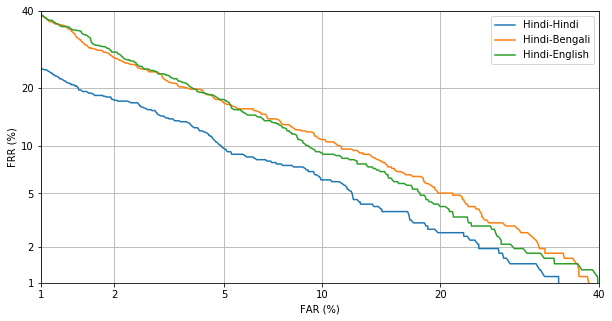

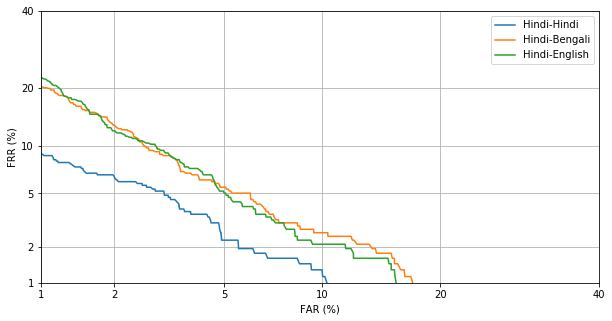

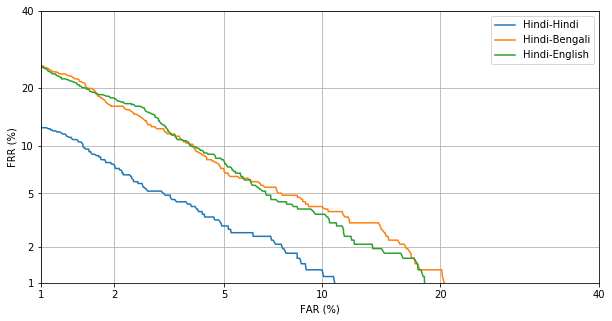

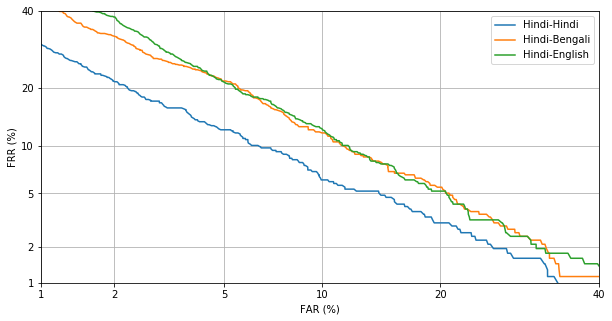

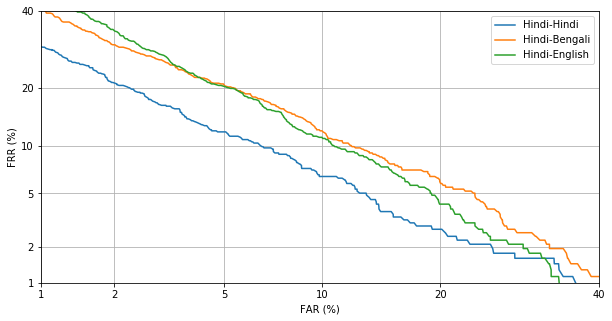

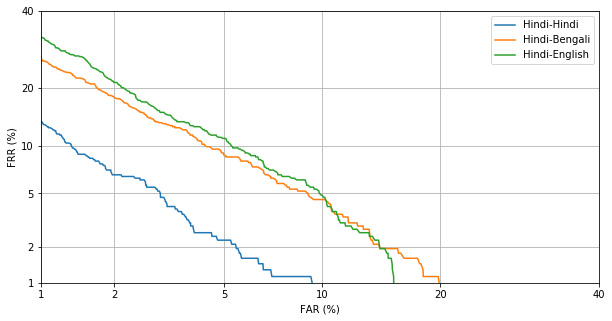

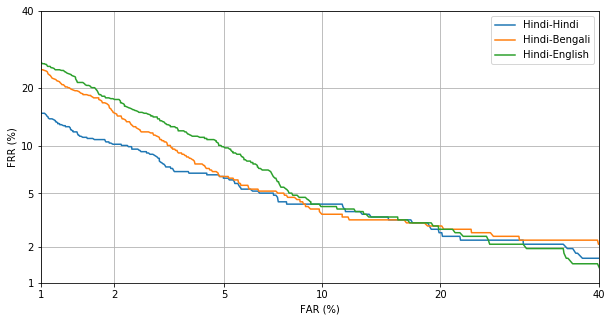

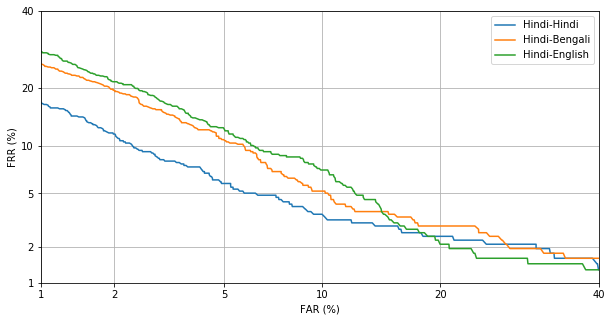

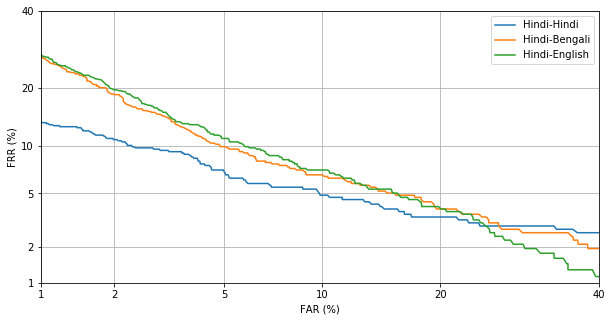

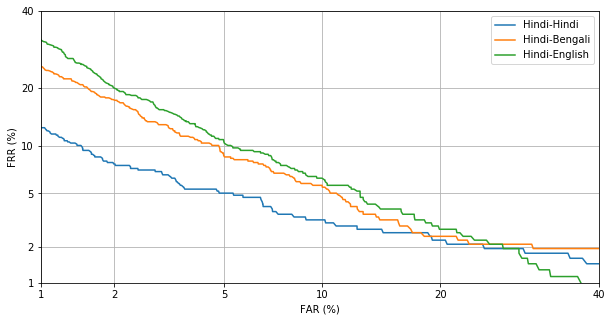

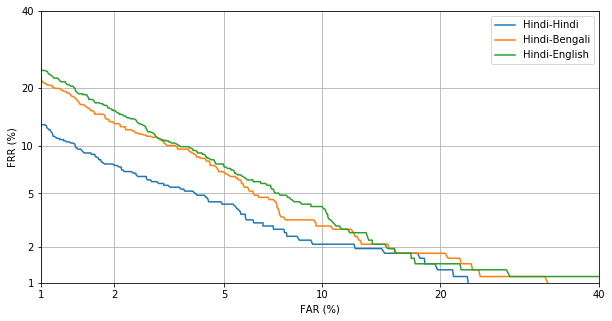

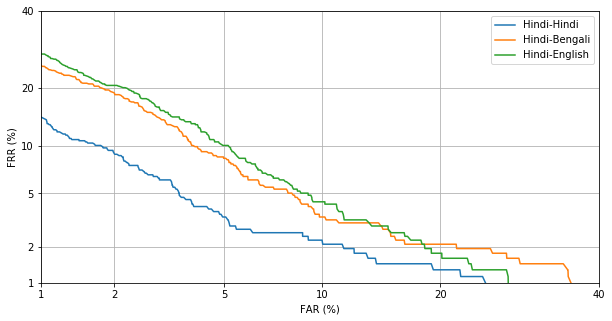

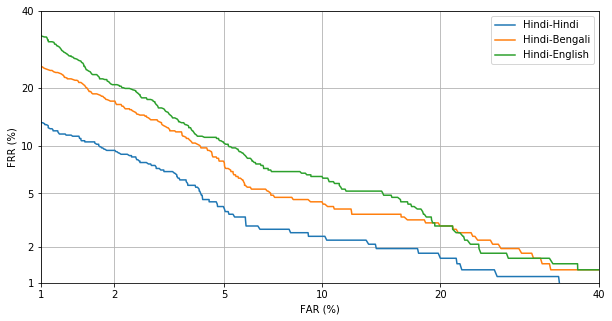

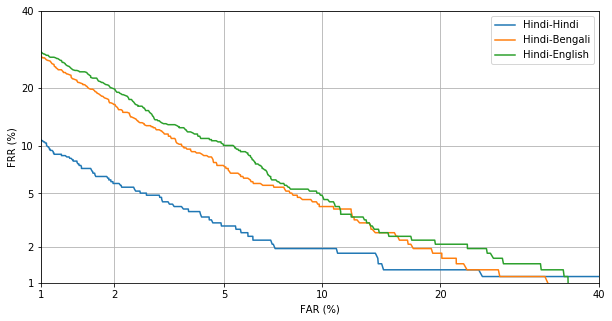

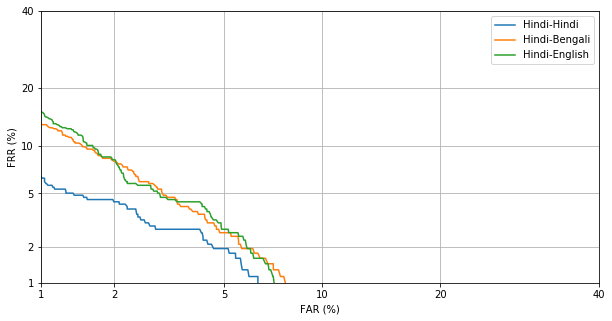

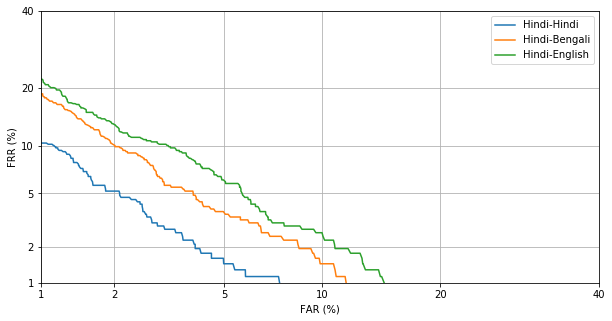

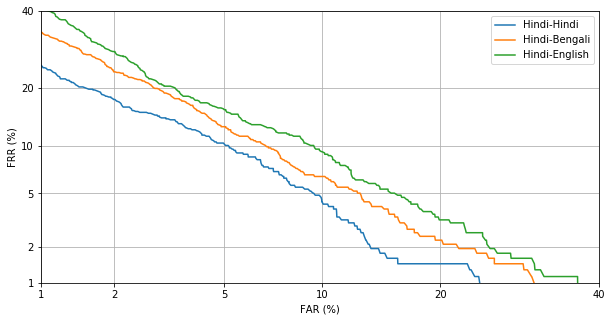

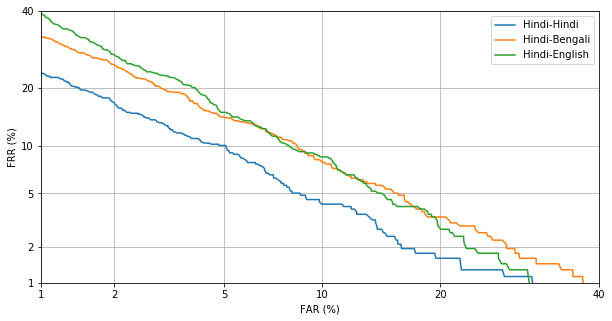

In [45]:
pyplot.ioff()
errors = []
for combination in combinations:
    print(combination)
    path1 = '{}-hindi-{}'.format(enroll_language, combination)
    path2 = '{}-bengali-{}'.format(enroll_language, combination)
    path3 = '{}-english-{}'.format(enroll_language, combination)

    E_E_FP = "{}/{} _adapt".format(source_folder,path1)
    E_N_FP = "{}/{} _adapt".format(source_folder,path2)
    E_H_FP = "{}/{} _adapt".format(source_folder,path3)
    try: 
        E_E_S = pd.read_csv(E_E_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
        E_E_T = pd.read_csv('SPARC_SRE16_2-3/{}/docs/trial_key.tsv'.format(path1), delimiter = '\t')

        E_E = pd.merge(E_E_T, E_E_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
        E_E = E_E[['targettype', 'score']]
        E_E_P = E_E.loc[E_E['targettype'] == 'target']['score']
        E_E_N = E_E.loc[E_E['targettype'] == 'nontarget']['score']

        E_N_S = pd.read_csv(E_N_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
        E_N_T = pd.read_csv('SPARC_SRE16_2-3/{}/docs/trial_key.tsv'.format(path2), delimiter = '\t')

        E_N = pd.merge(E_N_T, E_N_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
        E_N = E_N[['targettype', 'score']]
        E_N_P = E_N.loc[E_N['targettype'] == 'target']['score']
        E_N_N = E_N.loc[E_N['targettype'] == 'nontarget']['score']

        E_H_S = pd.read_csv(E_H_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
        E_H_T = pd.read_csv('SPARC_SRE16_2-3/{}/docs/trial_key.tsv'.format(path3), delimiter = '\t')

        E_H = pd.merge(E_H_T, E_H_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
        E_H = E_H[['targettype', 'score']]
        E_H_P = E_H.loc[E_H['targettype'] == 'target']['score']
        E_H_N = E_H.loc[E_H['targettype'] == 'nontarget']['score']

        fig = pyplot.figure(figsize=(10,5))
        bm.plot.det(E_E_N, E_E_P, linestyle='-', label='Hindi-Hindi') 
        bm.plot.det(E_N_N, E_N_P, linestyle='-', label='Hindi-Bengali')
        bm.plot.det(E_H_N, E_H_P, linestyle='-', label='Hindi-English')
        bm.plot.det_axis([1, 40, 1, 40]) 
        pyplot.xlabel('FAR (%)') 
        pyplot.ylabel('FRR (%)') 
        pyplot.grid(True)
        pyplot.legend()
        #pyplot.show()
        fig.savefig('results/sparc/{}-enroll-adapt-{}-{}-{}'.format(enroll_language,enroll_session,test_session, combination))
    except: 
        errors.append(combination)

In [40]:
errors

['iphone11-iphone6s',
 'iphone11-samsungs8',
 'iphone11-samsungs7',
 'iphone11-iphone10',
 'iphone6s-iphone11',
 'iphone6s-samsungs8',
 'iphone6s-samsungs7',
 'iphone6s-iphone10',
 'samsungs8-iphone11',
 'samsungs8-iphone6s',
 'samsungs8-samsungs7',
 'samsungs8-iphone10',
 'samsungs7-iphone11',
 'samsungs7-iphone6s',
 'samsungs7-samsungs8',
 'samsungs7-iphone10',
 'iphone10-iphone11',
 'iphone10-iphone6s',
 'iphone10-samsungs8',
 'iphone10-samsungs7']

In [36]:
source_folder = 'score_files_sre16_SWAN'
enroll_language = 'hindi'
enroll_session = '02'
test_session = '03'

In [37]:
errors = []
for combination in combinations:
    
path1 = '{}-{}-p-p-{}-{}'.format(enroll_language, enroll_language, enroll_session, test_session)
path2 = '{}-English-p-p-{}-{}'.format(enroll_language, enroll_session, test_session)

E_E_FP = "{}/{} _adapt".format(source_folder,path1)
E_N_FP = "{}/{} _adapt".format(source_folder,path2)

E_E_S = pd.read_csv(E_E_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
E_E_T = pd.read_csv('SWAN_multiple/{}/trial_key.tsv'.format(path1), delimiter = '\t')

E_E = pd.merge(E_E_T, E_E_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
E_E = E_E[['targettype', 'score']]
E_E_P = E_E.loc[E_E['targettype'] == 'target']['score']
E_E_N = E_E.loc[E_E['targettype'] == 'nontarget']['score']

E_N_S = pd.read_csv(E_N_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
E_N_T = pd.read_csv('SWAN_multiple/{}/trial_key.tsv'.format(path2), delimiter = '\t')

E_N = pd.merge(E_N_T, E_N_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
E_N = E_N[['targettype', 'score']]
E_N_P = E_N.loc[E_N['targettype'] == 'target']['score']
E_N_N = E_N.loc[E_N['targettype'] == 'nontarget']['score']

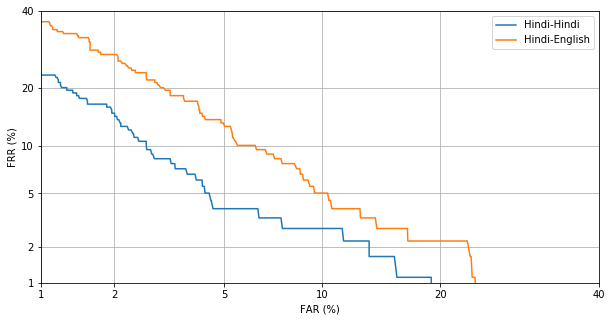

In [38]:
fig = pyplot.figure(figsize=(10,5))
bm.plot.det(E_E_N, E_E_P, linestyle='-', label='{}-{}'.format(enroll_language, enroll_language)) 
bm.plot.det(E_N_N, E_N_P, linestyle='-', label='{}-English'.format(enroll_language))
bm.plot.det_axis([1, 40, 1, 40]) 
pyplot.xlabel('FAR (%)') 
pyplot.ylabel('FRR (%)') 
pyplot.grid(True)
pyplot.legend()
pyplot.show()
fig.savefig('results/SPARC/{}-enroll-adapt-{}-{}'.format(enroll_language, enroll_session,test_session))

In [68]:
source_folder = 'score_files_sre16_SWAN'
enroll_language = 'Norwegian'
plda_type = "adapt"

In [69]:
path1 = '{}-{}-p-p-02-03'.format(enroll_language, enroll_language)
path2 = '{}-{}-p-p-02-04'.format(enroll_language, enroll_language)
path3 = '{}-{}-p-p-02-05'.format(enroll_language, enroll_language)
path4 = '{}-{}-p-p-02-06'.format(enroll_language, enroll_language)

E_E_FP = "{}/{} _{}".format(source_folder,path1,plda_type)
E_N_FP = "{}/{} _{}".format(source_folder,path2,plda_type)
E_H_FP = "{}/{} _{}".format(source_folder,path3,plda_type)
E_F_FP = "{}/{} _{}".format(source_folder,path4,plda_type)

E_E_S = pd.read_csv(E_E_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
E_E_T = pd.read_csv('SWAN_multiple/{}/trial_key.tsv'.format(path1), delimiter = '\t')

E_E = pd.merge(E_E_T, E_E_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
E_E = E_E[['targettype', 'score']]
E_E_P = E_E.loc[E_E['targettype'] == 'target']['score']
E_E_N = E_E.loc[E_E['targettype'] == 'nontarget']['score']

E_N_S = pd.read_csv(E_N_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
E_N_T = pd.read_csv('SWAN_multiple/{}/trial_key.tsv'.format(path2), delimiter = '\t')

E_N = pd.merge(E_N_T, E_N_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
E_N = E_N[['targettype', 'score']]
E_N_P = E_N.loc[E_N['targettype'] == 'target']['score']
E_N_N = E_N.loc[E_N['targettype'] == 'nontarget']['score']

E_H_S = pd.read_csv(E_H_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
E_H_T = pd.read_csv('SWAN_multiple/{}/trial_key.tsv'.format(path3), delimiter = '\t')

E_H = pd.merge(E_H_T, E_H_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
E_H = E_H[['targettype', 'score']]
E_H_P = E_H.loc[E_H['targettype'] == 'target']['score']
E_H_N = E_H.loc[E_H['targettype'] == 'nontarget']['score']

E_F_S = pd.read_csv(E_F_FP, delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
E_F_T = pd.read_csv('SWAN_multiple/{}/trial_key.tsv'.format(path4), delimiter = '\t')

E_F = pd.merge(E_F_T, E_F_S, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id']).dropna(subset=['score'])
E_F = E_F[['targettype', 'score']]
E_F_P = E_F.loc[E_F['targettype'] == 'target']['score']
E_F_N = E_F.loc[E_F['targettype'] == 'nontarget']['score']

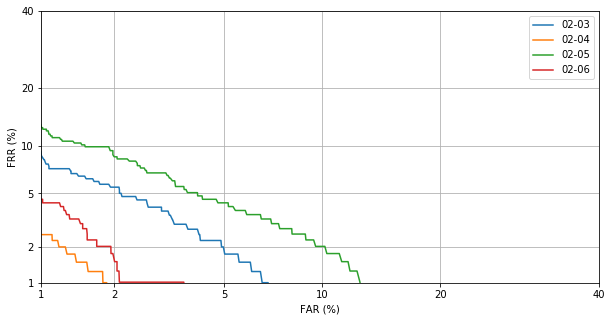

In [70]:
fig = pyplot.figure(figsize=(10,5))
bm.plot.det(E_E_N, E_E_P, linestyle='-', label='02-03') 
bm.plot.det(E_N_N, E_N_P, linestyle='-', label='02-04')
bm.plot.det(E_H_N, E_H_P, linestyle='-', label='02-05')
bm.plot.det(E_F_N, E_F_P, linestyle='-', label='02-06')
bm.plot.det_axis([1, 40, 1, 40]) 
pyplot.xlabel('FAR (%)') 
pyplot.ylabel('FRR (%)') 
pyplot.grid(True)
pyplot.legend()
pyplot.show()
fig.savefig('results/SPARC/{}-enroll-{}-all'.format(enroll_language,plda_type))